In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

import streamlit as st
from datetime import date

In [3]:
change = pd.read_csv('한국언론진흥재단_코로나19이후국민의일상변화조사_코로나19 이후 일상 활동 변화_20201231.csv',encoding='euc-kr')
view = pd.read_csv('국세청_사업자현황_업종_서울특별시.csv',encoding='euc-kr')

In [4]:
change = change.drop(['사례수'], axis=1)
change = change.set_index('항목')

In [5]:
change_plus = change.sort_values(by='증가', ascending=False)
change_minus = change.sort_values(by='감소', ascending=False)

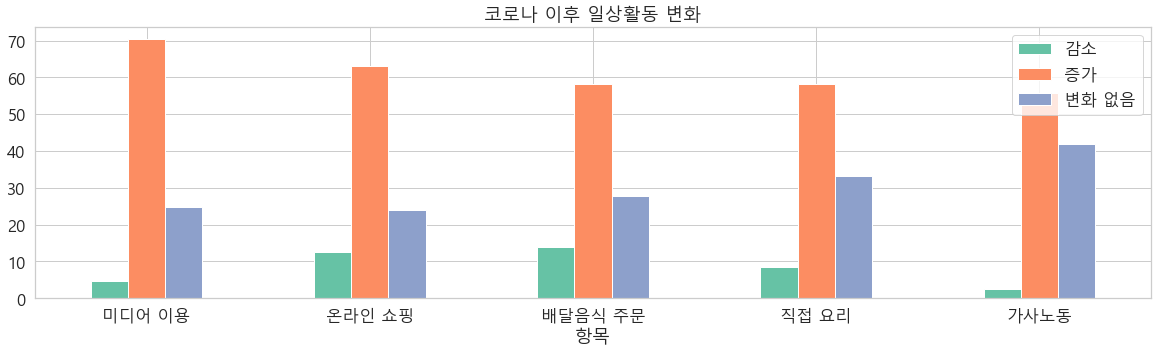

In [6]:
#  증가 상위 5개 
change_plus[:5].plot.bar(figsize = (20,5), rot=0, title = '코로나 이후 일상활동 변화');

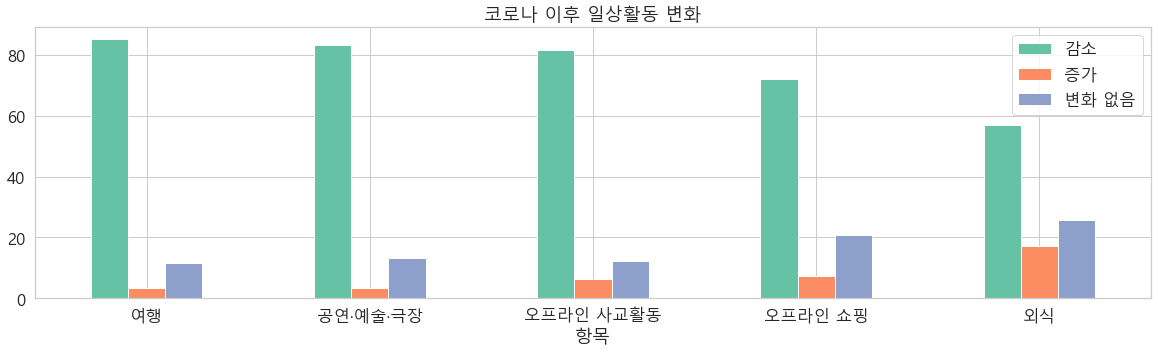

In [7]:
#  감소 상위 5개
change_minus[:5].plot.bar(figsize = (20,5), rot=0, title = '코로나 이후 일상활동 변화');

In [8]:
view

,업종,시도,시군구,20_02,20_03,20_04,20_05,20_06,20_07,20_08,...,21_06,21_07,21_08,21_09,21_10,21_11,21_12,22_01,22_02,22_03
0,LPG 충전소,서울특별시,중구,*,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,0,*
1,LPG 충전소,서울특별시,성동구,*,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,*
2,LPG 충전소,서울특별시,광진구,*,*,*,*,*,*,*,...,*,3,3,*,3,3,*,*,*,*
3,LPG 충전소,서울특별시,동대문구,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,LPG 충전소,서울특별시,중랑구,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,휴대폰가게,서울특별시,관악구,141,137,141,144,143,148,147,...,145,140,134,133,132,134,134,135,136,137
2480,휴대폰가게,서울특별시,서초구,113,110,114,114,116,116,116,...,120,120,119,124,122,123,122,123,124,125
2481,휴대폰가게,서울특별시,강남구,160,159,157,166,169,169,164,...,172,169,174,172,172,175,175,178,176,174
2482,휴대폰가게,서울특별시,송파구,174,172,171,172,177,176,176,...,178,183,182,175,173,171,163,166,169,169


In [9]:
# *로 처리된 결측치 0으로 바꿔주기

view = view.replace('*', np.nan)
view = view.replace(' * ', np.nan)

view.fillna(0, inplace = True)
view.fillna(0, inplace = True)

In [10]:
# 실생활과 밀접한 직종만 뽑기

# view = view.loc[view['업종'].isin(types)]


types = ['LPG 충전소',
 'PC방',
 '가구점',
 '가전제품수리점',
 '가전제품판매점',
 '간이주점',
 '간판광고물업',
 '건어물가게',
 '곡물가게',
 '과일가게',
 '교습소ㆍ공부방',
 '교습학원',
 '기타음식점',
 '꽃가게',
 '노래방',
 '당구장',
 '독서실',
 '목욕탕',
 '문구점',
 '미용실',
 '부동산중개업',
 '분식점',
 '사진촬영업',
 '생선가게',
 '서점',
 '세탁소',
 '슈퍼마켓',
 '스포츠시설운영업',
 '스포츠용품점',
 '시계ㆍ귀금속점',
 '식료품가게',
 '신발가게',
 '실내스크린골프점',
 '실내장식가게',
 '실외골프연습장',
 '안경점',
 '애완용품점',
 '여관ㆍ모텔',
 '여행사',
 '예식장',
 '옷가게',
 '이륜자동차판매점',
 '이발소',
 '일식전문점',
 '자동차수리점',
 '자전거판매점',
 '장난감가게',
 '정육점',
 '제과점',
 '주유소',
 '주차장운영업',
 '중고차판매점',
 '중식전문점',
 '채소가게',
 '철물점',
 '침구ㆍ커튼가게',
 '커피음료점',
 '컴퓨터판매점',
 '통신판매업',
 '패스트푸드점',
 '펜션ㆍ게스트하우스',
 '편의점',
 '피부관리업',
 '한식전문점',
 '헬스클럽',
 '호프전문점',
 '화장품가게',
 '휴대폰가게']

view = view.loc[view['업종'].isin(types)]

In [11]:
for i in range(2,10):
    view[f'20_0{i}'] = view[f'20_0{i}'].astype(int)
    view[f'21_0{i}'] = view[f'21_0{i}'].astype(int)
view['21_01'] = view['21_01'].astype(int)    
view['20_10'] = view['20_10'].astype(int)
view['20_11'] = view['20_11'].astype(int)
view['20_12'] = view['20_12'].astype(int)
view['21_10'] = view['21_10'].astype(int)
view['21_11'] = view['21_11'].astype(int)
view['21_12'] = view['21_12'].astype(int)
view['22_01'] = view['22_01'].astype(int)
view['22_02'] = view['22_02'].astype(int)
view['22_03'] = view['22_03'].astype(int)


In [12]:
view_month = view.groupby(['업종']).sum().transpose();view_month

업종,LPG 충전소,PC방,가구점,가전제품수리점,가전제품판매점,간이주점,간판광고물업,건어물가게,곡물가게,과일가게,...,통신판매업,패스트푸드점,펜션ㆍ게스트하우스,편의점,피부관리업,한식전문점,헬스클럽,호프전문점,화장품가게,휴대폰가게
20_02,70,1622,1007,2628,1532,4541,2643,739,644,1234,...,82768,6452,737,7997,7486,53654,1908,6813,6633,3090
20_03,72,1595,1012,2665,1522,4429,2643,743,642,1237,...,82828,6503,756,7998,7537,53726,1914,6692,6544,3066
20_04,71,1597,1021,2716,1529,4371,2634,743,644,1257,...,85109,6559,759,8023,7564,53851,1934,6606,6559,3069
20_05,70,1591,1027,2748,1539,4306,2630,752,642,1284,...,87346,6628,759,8025,7602,54097,1940,6553,6599,3090
20_06,69,1651,1031,2801,1541,4259,2612,757,640,1289,...,89929,6711,759,8045,7669,54318,1957,6515,6599,3097
20_07,69,1666,1032,2804,1546,4219,2610,766,645,1301,...,92919,6818,762,8092,7761,54400,1986,6476,6618,3114
20_08,69,1631,1024,2812,1550,4162,2599,766,643,1302,...,95356,6861,751,8110,7756,54448,2006,6361,6605,3100
20_09,69,1649,1023,2816,1552,4086,2596,771,644,1295,...,97605,6936,747,8127,7803,54650,2022,6256,6598,3112
20_10,69,1613,1031,2827,1545,4031,2590,771,643,1308,...,100521,6970,733,8133,7834,54640,2056,6199,6581,3107
20_11,69,1584,1031,2823,1538,3968,2585,767,643,1306,...,103059,7090,720,8142,7863,54696,2077,6119,6581,3095


In [13]:
view_month['음식점'] = view_month['한식전문점']+view_month['일식전문점']+view_month['중식전문점']

# food = {'한식전문점':'음식점','일식전문점':'음식점','중식전문점':'음식점','분식점':'음식점','기타음식점':'음식점'}

# view_month = view_month.rename(columns = food)




In [14]:
view_month['음식점']  #79369  81110

20_02    64020
20_03    64037
20_04    64149
20_05    64363
20_06    64595
20_07    64704
20_08    64754
20_09    65008
20_10    65000
20_11    65081
20_12    65168
21_01    65359
21_02    65580
21_03    65915
21_04    65920
21_05    65848
21_06    65859
21_07    65988
21_08    66008
21_09    65936
21_10    66017
21_11    65932
21_12    65836
22_01    66128
22_02    66223
22_03    66315
Name: 음식점, dtype: int32

In [16]:
view_month = view_month.reset_index()

In [17]:
col = {'index':'일자'}
view_month = view_month.rename(columns = col)

2022-06-15 01:35:57.192 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-06-15 01:35:57.192 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


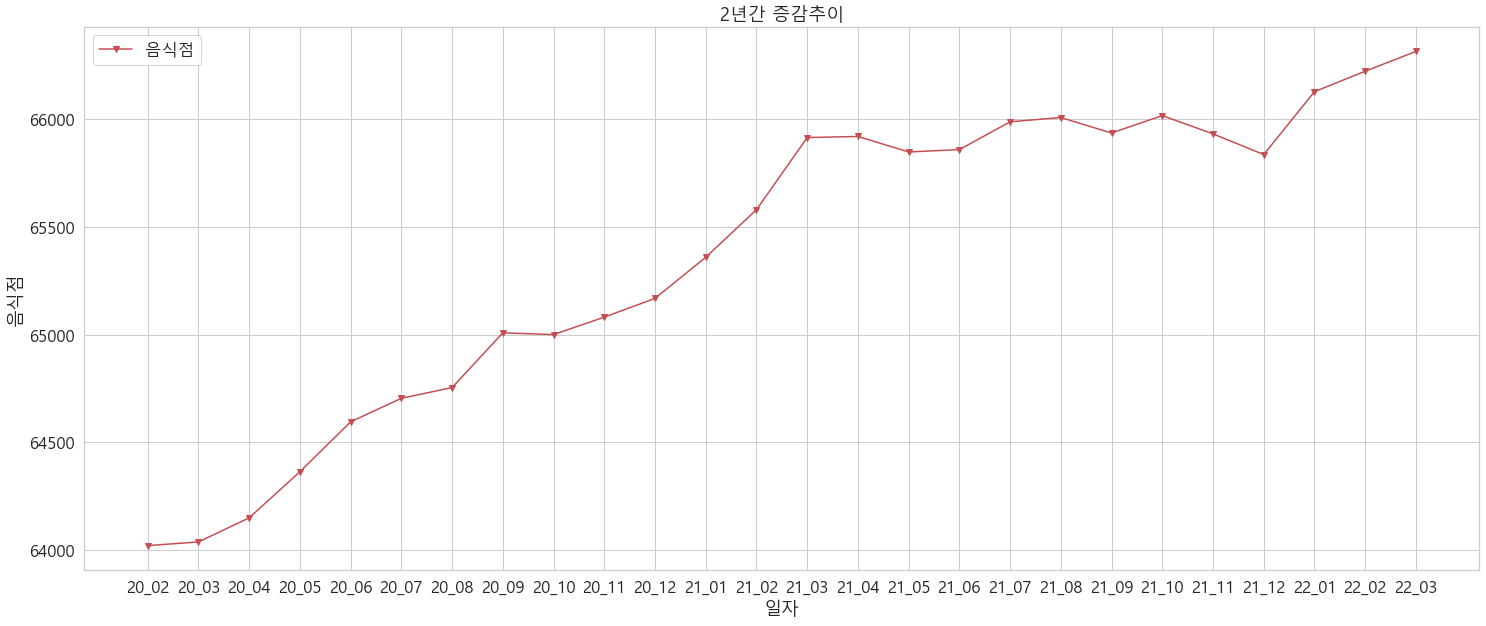

In [18]:
a = ['일자','음식점']
aa = view_month.loc[:,a]

fig, ax = plt.subplots(figsize=(25,10))
ax.plot(aa['일자'], aa['음식점'], marker='v',color='r', label='음식점')
# ax.plot(vv_plus['일자'], vv_plus['패스트푸드점'], marker='v',color='r', )
# ax.plot(vv_plus['일자'], vv_plus['커피음료점 백단위'], marker='v',color='g')
ax.set_xlabel('일자')
ax.set_ylabel('음식점')
ax.set_title('2년간 증감추이')
ax.legend()
plt.show()

In [16]:
# 증가한 업종들 

plus = ['일자','통신판매업','커피음료점','패스트푸드점']
vv_plus = view_month.loc[:,plus];vv_plus

업종,일자,통신판매업,커피음료점,패스트푸드점
0,20_02,82768,12391,6452
1,20_03,82828,12468,6503
2,20_04,85109,12624,6559
3,20_05,87346,12798,6628
4,20_06,89929,12985,6711
5,20_07,92919,13191,6818
6,20_08,95356,13286,6861
7,20_09,97605,13402,6936
8,20_10,100521,13456,6970
9,20_11,103059,13522,7090


2022-06-14 23:24:29.681 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-06-14 23:24:29.685 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


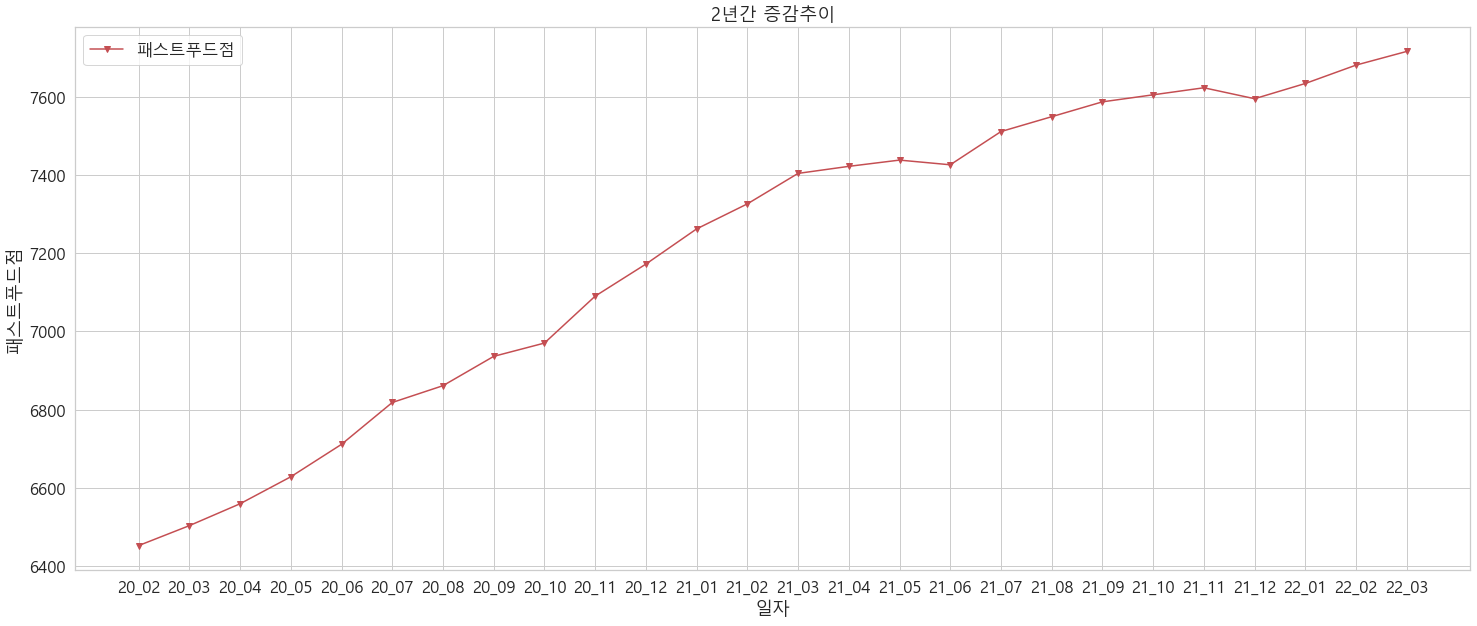

In [17]:
fig, ax = plt.subplots(figsize=(25,10))
ax.plot(vv_plus['일자'], vv_plus['패스트푸드점'], marker='v',color='r', label='패스트푸드점')
# ax.plot(vv_plus['일자'], vv_plus['패스트푸드점'], marker='v',color='r', )
# ax.plot(vv_plus['일자'], vv_plus['커피음료점 백단위'], marker='v',color='g')
ax.set_xlabel('일자')
ax.set_ylabel('패스트푸드점')
ax.set_title('2년간 증감추이')
ax.legend()
plt.show()

In [18]:
# 감소한 업종들

minus = ['일자','간이주점','호프전문점','여관ㆍ모텔']
vv_minus = view_month.loc[:,minus];vv_minus

col_1 = {'여관ㆍ모텔':'숙박업'}
vv_minus = vv_minus.rename(columns = col_1);vv_minus

업종,일자,간이주점,호프전문점,숙박업
0,20_02,4541,6813,1940
1,20_03,4429,6692,1915
2,20_04,4371,6606,1894
3,20_05,4306,6553,1876
4,20_06,4259,6515,1853
5,20_07,4219,6476,1836
6,20_08,4162,6361,1817
7,20_09,4086,6256,1806
8,20_10,4031,6199,1793
9,20_11,3968,6119,1782


2022-06-14 23:24:30.185 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-06-14 23:24:30.188 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


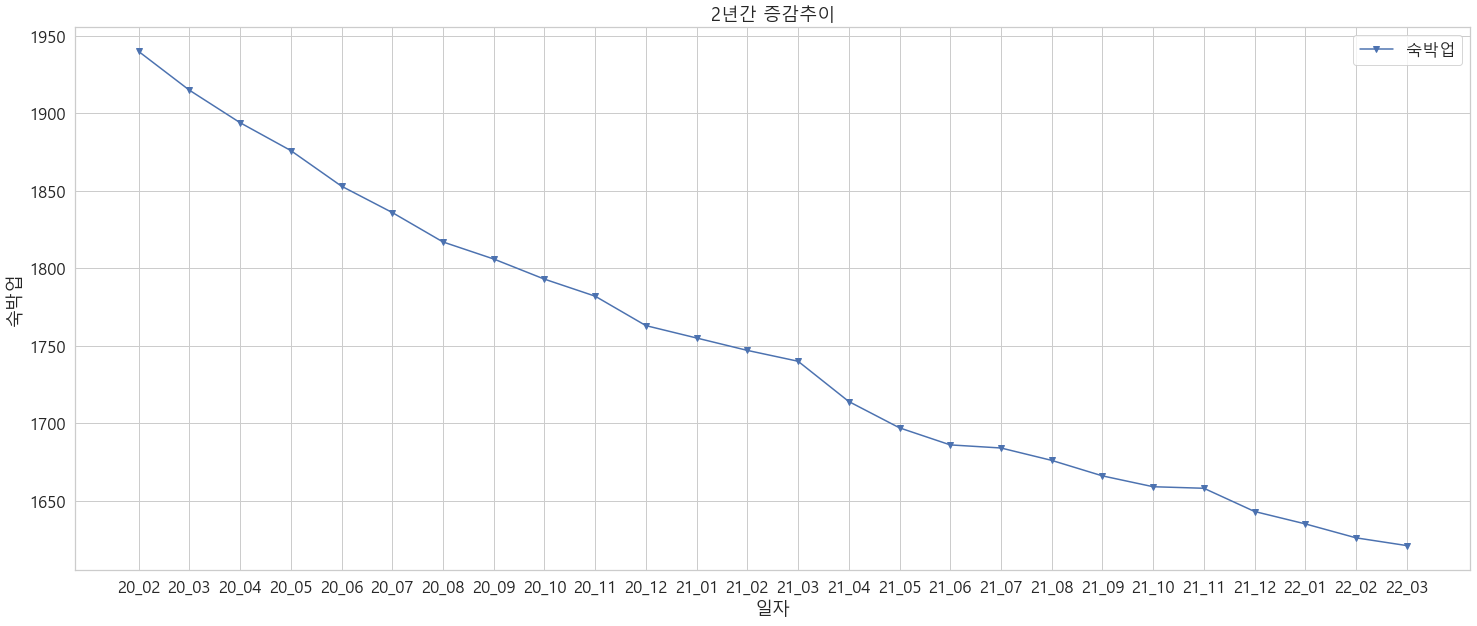

In [19]:
fig, ax = plt.subplots(figsize=(25,10))
ax.plot(vv_minus['일자'], vv_minus['숙박업'], marker='v',color='b',label='숙박업')
ax.set_xlabel('일자')
ax.set_ylabel('숙박업')
ax.set_title('2년간 증감추이')
ax.legend()
plt.show()

In [20]:
# 변동이 적은 업종들

same = ['일자','중고차판매점','시계ㆍ귀금속점','화장품가게','문구점','안경점']
vv_same = view_month.loc[:,same];vv_same

업종,일자,중고차판매점,시계ㆍ귀금속점,화장품가게,문구점,안경점
0,20_02,485,1876,6633,1543,2047
1,20_03,478,1864,6544,1543,2043
2,20_04,471,1858,6559,1541,2036
3,20_05,471,1859,6599,1536,2035
4,20_06,470,1862,6599,1543,2031
5,20_07,464,1862,6618,1542,2031
6,20_08,465,1871,6605,1545,2021
7,20_09,468,1875,6598,1549,2026
8,20_10,469,1874,6581,1540,2026
9,20_11,468,1875,6581,1539,2023


2022-06-14 23:24:30.697 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-06-14 23:24:30.699 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-06-14 23:24:30.701 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-06-14 23:24:30.703 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-06-14 23:24:30.705 INFO

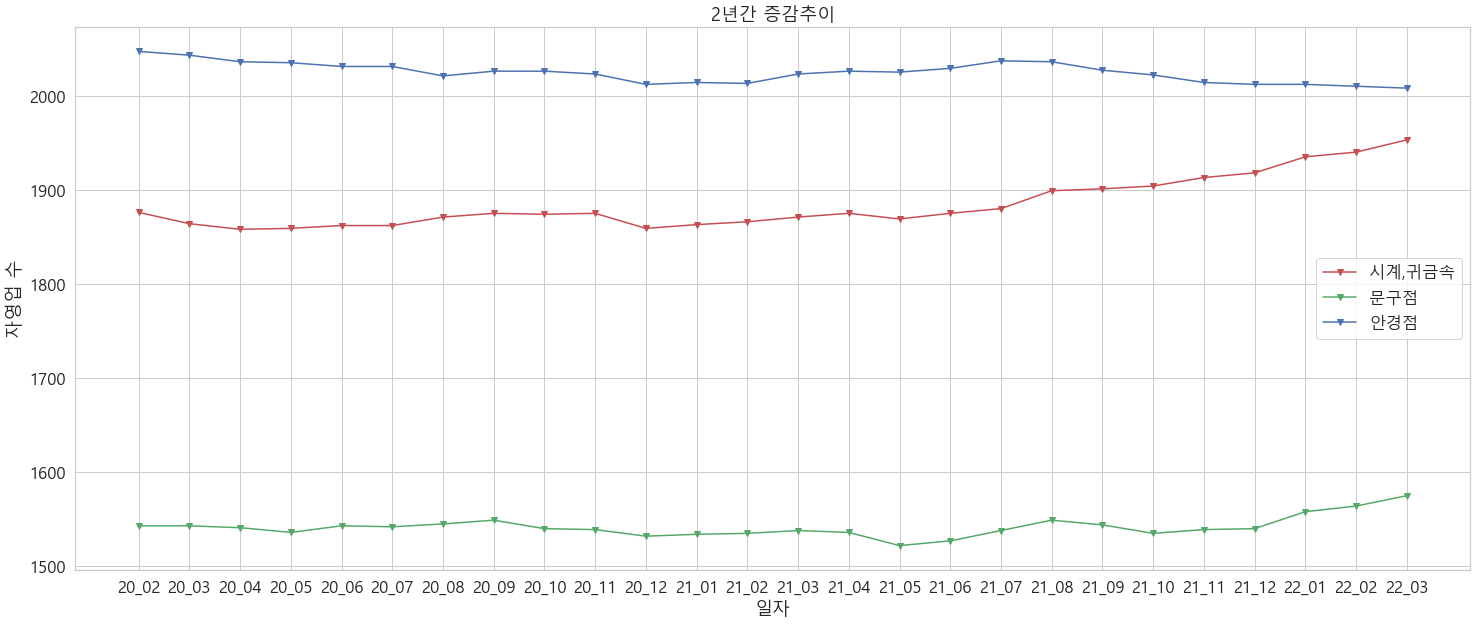

In [21]:
fig, ax = plt.subplots(figsize=(25,10))
ax.plot(vv_same['일자'], vv_same['시계ㆍ귀금속점'], marker='v',color='r', label = '시계,귀금속')
ax.plot(vv_same['일자'], vv_same['문구점'], marker='v',color='g', label = '문구점')
ax.plot(vv_same['일자'], vv_same['안경점'], marker='v',color='b', label = '안경점')
ax.legend()
ax.set_xlabel('일자')
ax.set_ylabel('자영업 수')
ax.set_title('2년간 증감추이')
plt.show()

2022-06-14 23:24:31.209 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-06-14 23:24:31.213 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


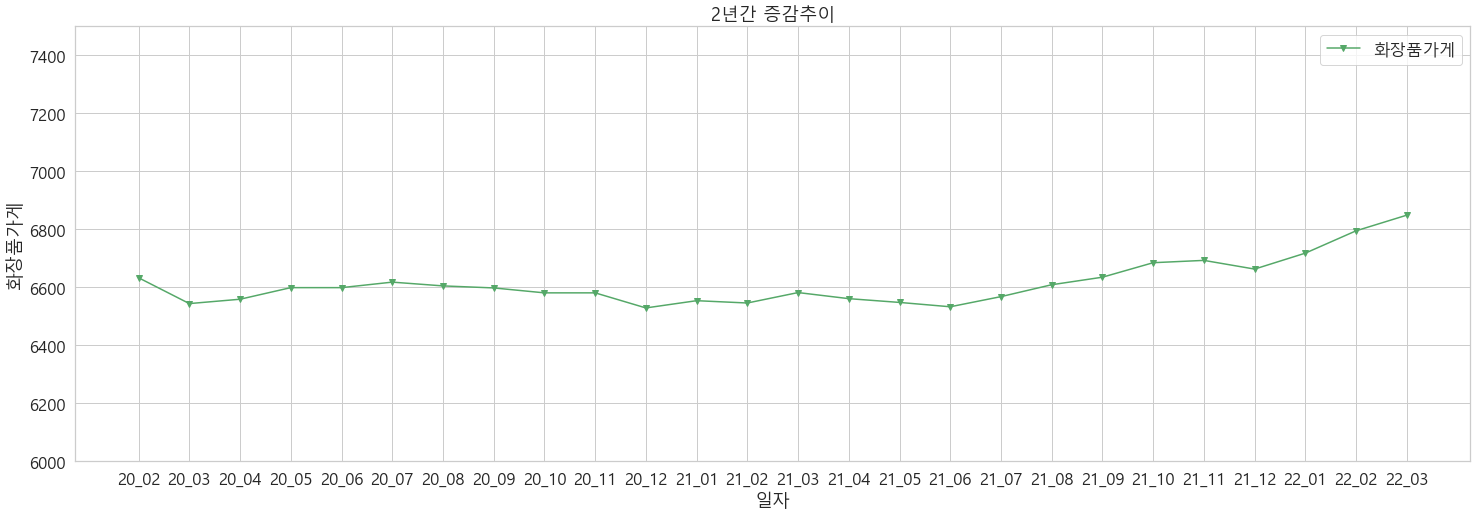

In [22]:
fig, ax = plt.subplots(figsize=(25,8))
ax.plot(vv_same['일자'], vv_same['화장품가게'], marker='v',color='g', label = '화장품가게')
# ax.plot(vv_same['일자'], vv_same['중고차판매점'], marker='v',color='g', label = '중고차판매점')
plt.ylim([6000,7500])
ax.legend()
ax.set_xlabel('일자')
ax.set_ylabel('화장품가게')
ax.set_title('2년간 증감추이')
plt.show()

In [23]:
view

,업종,시도,시군구,20_02,20_03,20_04,20_05,20_06,20_07,20_08,...,21_06,21_07,21_08,21_09,21_10,21_11,21_12,22_01,22_02,22_03
0,LPG 충전소,서울특별시,중구,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,LPG 충전소,서울특별시,성동구,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,LPG 충전소,서울특별시,광진구,0,0,0,0,0,0,0,...,0,3,3,0,3,3,0,0,0,0
3,LPG 충전소,서울특별시,동대문구,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,LPG 충전소,서울특별시,중랑구,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,휴대폰가게,서울특별시,관악구,141,137,141,144,143,148,147,...,145,140,134,133,132,134,134,135,136,137
2480,휴대폰가게,서울특별시,서초구,113,110,114,114,116,116,116,...,120,120,119,124,122,123,122,123,124,125
2481,휴대폰가게,서울특별시,강남구,160,159,157,166,169,169,164,...,172,169,174,172,172,175,175,178,176,174
2482,휴대폰가게,서울특별시,송파구,174,172,171,172,177,176,176,...,178,183,182,175,173,171,163,166,169,169


In [24]:
view_local = view.groupby(['업종','시군구']).sum()
view_local['폐업률%']=((view_local['20_02'] - view_local['22_03'])/view_local['20_02'])*100
view_local['폐업률%']

업종       시군구
LPG 충전소  강남구     0.000000
         강동구    25.000000
         강북구     0.000000
         강서구    -7.692308
         관악구     0.000000
                  ...    
휴대폰가게    용산구    11.827957
         은평구     6.666667
         종로구    -8.333333
         중구      2.127660
         중랑구   -28.828829
Name: 폐업률%, Length: 1690, dtype: float64

In [25]:
view_alcohol = view_local.loc['간이주점','폐업률%'].reset_index()

In [26]:
a = view_alcohol.sort_values('폐업률%', ascending = False).head(12)

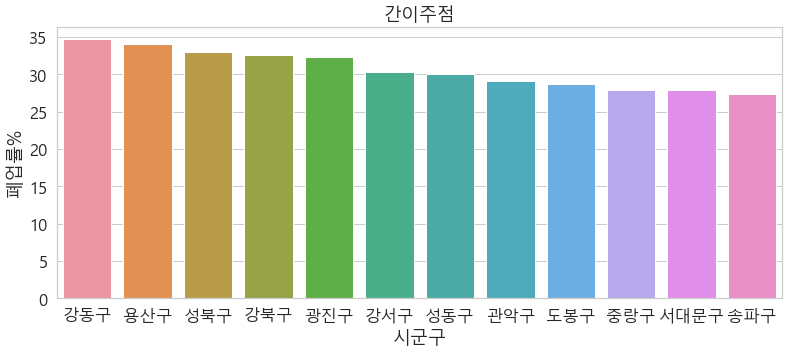

In [27]:
plt.figure(figsize=(13,5))
plt.xticks(rotation=0)
plt.title('간이주점')
sns.barplot(x='시군구', y='폐업률%', data=a);

In [28]:
view_hope = view_local.loc['호프전문점','폐업률%'].reset_index()

b = view_hope.sort_values('폐업률%', ascending = False).head(12)

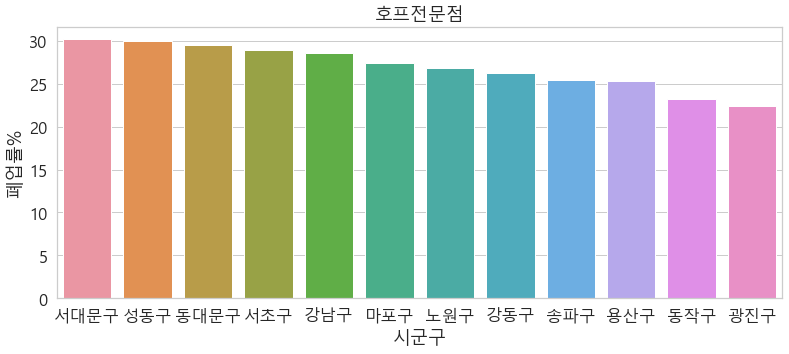

In [29]:
plt.figure(figsize=(13,5))
plt.xticks(rotation=0)
plt.title('호프전문점')
sns.barplot(x='시군구', y='폐업률%', data=b);

In [30]:
view_motel = view_local.loc['여관ㆍ모텔','폐업률%'].reset_index()


c = view_motel .sort_values('폐업률%', ascending = False).head(12)

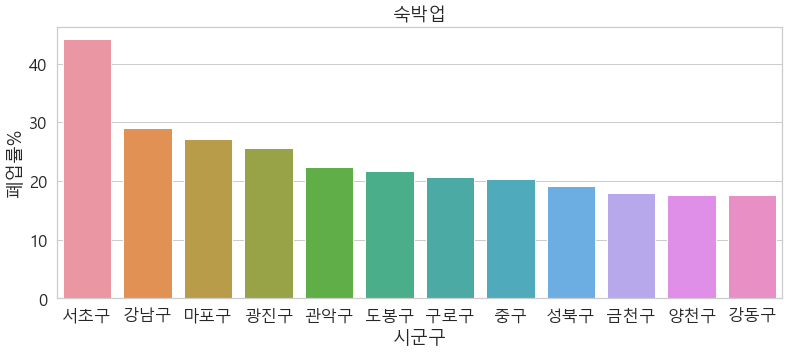

In [31]:
plt.figure(figsize=(13,5))
plt.xticks(rotation=0)
plt.title('숙박업')
sns.barplot(x='시군구', y='폐업률%', data=c);

In [32]:
# view.to_csv('view.csv', sep=',', na_rep='NaN', index=False, encoding="utf-8-sig")


In [33]:
view
# view.iloc[:,]

,업종,시도,시군구,20_02,20_03,20_04,20_05,20_06,20_07,20_08,...,21_06,21_07,21_08,21_09,21_10,21_11,21_12,22_01,22_02,22_03
0,LPG 충전소,서울특별시,중구,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,LPG 충전소,서울특별시,성동구,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,LPG 충전소,서울특별시,광진구,0,0,0,0,0,0,0,...,0,3,3,0,3,3,0,0,0,0
3,LPG 충전소,서울특별시,동대문구,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,LPG 충전소,서울특별시,중랑구,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,휴대폰가게,서울특별시,관악구,141,137,141,144,143,148,147,...,145,140,134,133,132,134,134,135,136,137
2480,휴대폰가게,서울특별시,서초구,113,110,114,114,116,116,116,...,120,120,119,124,122,123,122,123,124,125
2481,휴대폰가게,서울특별시,강남구,160,159,157,166,169,169,164,...,172,169,174,172,172,175,175,178,176,174
2482,휴대폰가게,서울특별시,송파구,174,172,171,172,177,176,176,...,178,183,182,175,173,171,163,166,169,169
